# Project 3

- **Dataset(s) to be used:** [Income by Career and Gender in 2015](https://www.kaggle.com/datasets/jonavery/incomes-by-career-and-gender)
- **Analysis question:** [Which careers have relatively high income and is there differences between male and female?]
- **Columns that will (likely) be used:**
  - All_weekly
  - M_weekly
  - F_weekly
- **Hypothesis**: There are some very high-paid jobs, and the types of high-paying jobs for men and women are different 
- **Site URL:** Data are retrived from [Bureau of Labor Statistics](https://www.bls.gov/opub/)


In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

First, I will import the data and do the cleaning work

In [2]:
import pandas as pd

df = pd.read_csv('inc_gender.csv')
df

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
...,...,...,...,...,...,...,...
553,Pumping station operators,18,Na,17,Na,1,Na
554,Refuse and recyclable material collectors,72,501,66,496,6,Na
555,Mine shuttle car operators,0,Na,0,Na,0,Na
556,"Tank car, truck, and ship loaders",6,Na,6,Na,0,Na


In [3]:
df2 = df.loc[1:,['Occupation','All_weekly','M_weekly','F_weekly']] # exclude the all occupation row and population columns
df3 = df2[~df2['Occupation'].apply(str.isupper)] # since words with all capitals are catergories instead of specific job, we exclude them

df4 = df3[df3['All_weekly'] != 'Na'].copy() 
df4['All_weekly'] = df4['All_weekly'].astype(int)  # Convert 'All_weekly' to integers

df4_sorted = df4.sort_values(by='All_weekly', ascending=False)
df4_sorted

,Occupation,All_weekly,M_weekly,F_weekly
2,Chief executives,2041,2251,1836
136,"Judges, magistrates, and other judicial workers",1952,Na,Na
176,Pharmacists,1920,2117,1811
20,Architectural and engineering managers,1899,1892,Na
134,Lawyers,1886,1914,1717
...,...,...,...,...
240,Food preparation workers,402,414,388
248,"Hosts and hostesses, restaurant, lounge, and c...",400,Na,397
247,Dishwashers,398,401,Na
242,"Combined food preparation and serving workers,...",391,401,380


In [4]:
# It's hard to visualize that all the occupations, so we focus on the highest and lowest 15 occupations
first = df4_sorted.head(15)

last = df4_sorted.tail(15)

sub_all = pd.concat([first, last])
sub_all

,Occupation,All_weekly,M_weekly,F_weekly
2,Chief executives,2041,2251,1836
136,"Judges, magistrates, and other judicial workers",1952,Na,Na
176,Pharmacists,1920,2117,1811
20,Architectural and engineering managers,1899,1892,Na
134,Lawyers,1886,1914,1717
86,Computer hardware engineers,1876,1871,Na
177,Physicians and surgeons,1824,1915,1533
87,Electrical and electronics engineers,1778,1819,Na
523,Aircraft pilots and flight engineers,1735,1830,Na
9,Computer and information systems managers,1728,1817,1563


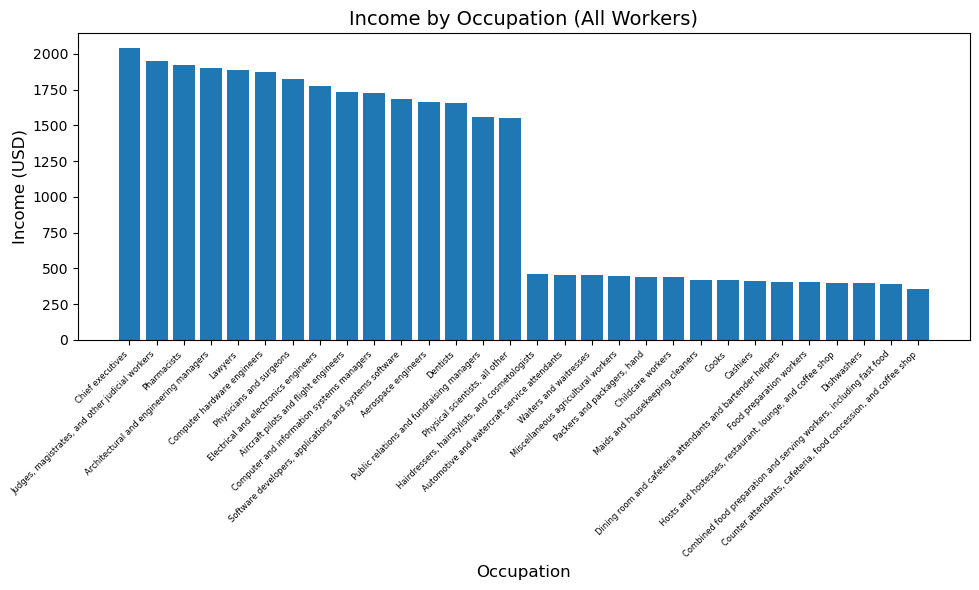

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sub_all['Occupation'], sub_all['All_weekly'])
plt.title('Income by Occupation (All Workers)', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.tight_layout()

plt.show()

The diagram is expected. It is not suprised to see the Chief executives, judges, Pharmacists, and some others are paid the highest weekly, while counter attendants, workers preparing fast food, and dishwashers are paid relatively low. Now let's check the difference between male and female.

In [6]:
df_m = df3[df3['M_weekly'] != 'Na'].copy() 
df_m['M_weekly'] = df_m['M_weekly'].astype(int)  # Convert 'All_weekly' to integers

df_m_sorted = df_m.sort_values(by='M_weekly', ascending=False)
df_m_sorted

,Occupation,All_weekly,M_weekly,F_weekly
2,Chief executives,2041,2251,1836
176,Pharmacists,1920,2117,1811
177,Physicians and surgeons,1824,1915,1533
134,Lawyers,1886,1914,1717
20,Architectural and engineering managers,1899,1892,Na
...,...,...,...,...
239,Cooks,416,427,400
240,Food preparation workers,402,414,388
242,"Combined food preparation and serving workers,...",391,401,380
247,Dishwashers,398,401,Na


In [7]:
df_f = df3[df3['F_weekly'] != 'Na'].copy() 
df_f['F_weekly'] = df_f['F_weekly'].astype(int)  # Convert 'All_weekly' to integers

df_f_sorted = df_f.sort_values(by='F_weekly', ascending=False)
df_f_sorted

,Occupation,All_weekly,M_weekly,F_weekly
2,Chief executives,2041,2251,1836
176,Pharmacists,1920,2117,1811
134,Lawyers,1886,1914,1717
9,Computer and information systems managers,1728,1817,1563
177,Physicians and surgeons,1824,1915,1533
...,...,...,...,...
239,Cooks,416,427,400
355,Miscellaneous agricultural workers,445,460,398
248,"Hosts and hostesses, restaurant, lounge, and c...",400,Na,397
240,Food preparation workers,402,414,388


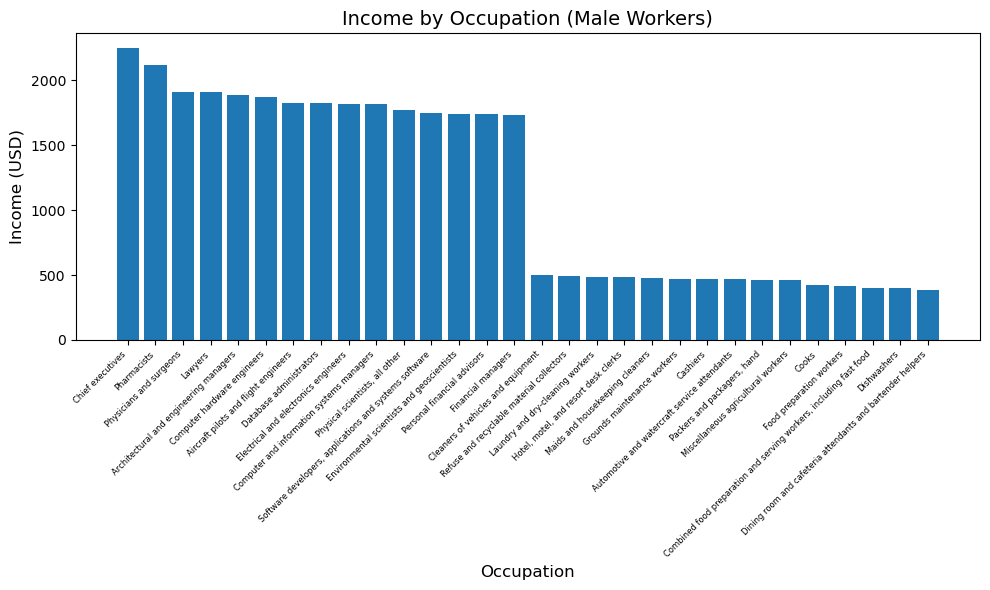

In [8]:
first_m = df_m_sorted.head(15)
last_m = df_m_sorted.tail(15)
sub_m = pd.concat([first_m, last_m])

plt.figure(figsize=(10, 6))
plt.bar(sub_m['Occupation'], sub_m['M_weekly'])
plt.title('Income by Occupation (Male Workers)', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.tight_layout()

plt.show()

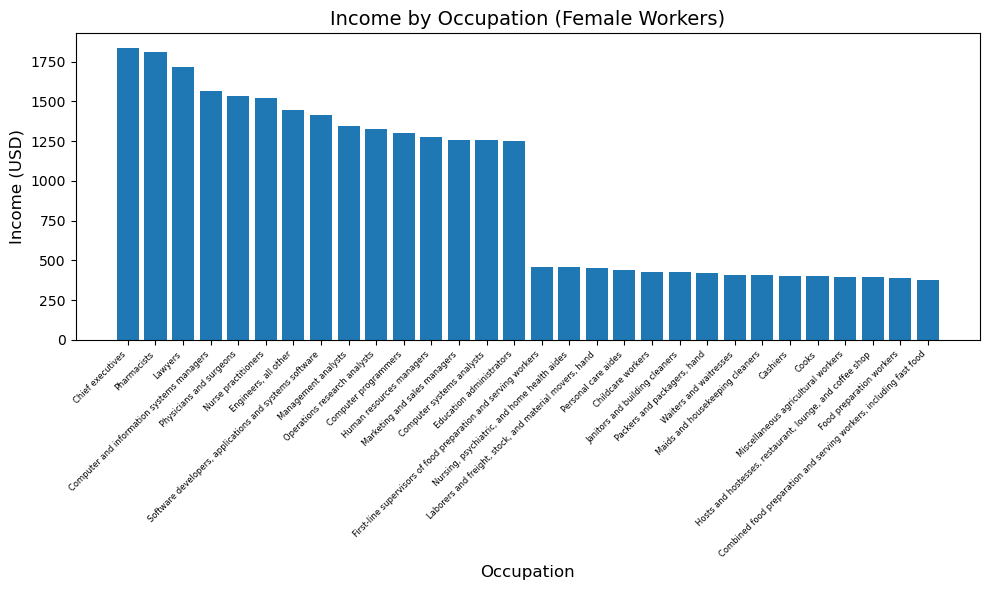

In [9]:
first_f = df_f_sorted.head(15)
last_f = df_f_sorted.tail(15)
sub_f = pd.concat([first_f, last_f])

plt.figure(figsize=(10, 6))
plt.bar(sub_f['Occupation'], sub_f['F_weekly'])
plt.title('Income by Occupation (Female Workers)', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.tight_layout()

plt.show()

Still, jobs relates to management, laws, and computer science are paid high for both male and female. While the low-paid jobs are quite similar for both gender, we observe a different pattern in highly-paid jobs. For male, there are more careers related to science, like Aircraft engineers and database administrators. For femlae, there are more careers relate to business, like Management, HR and marketing.

Therefore, for our hypothesis, we do observe a great difference in high-paid and low-paid jobs (more than 5 times per week) and a slight different pattern between high-paid jobs of female and that of male.

In [10]:
df_all = df3[(df3['All_weekly'] != 'Na')&(df3['M_weekly'] != 'Na')&(df3['F_weekly'] != 'Na')].copy()
df_all['M_weekly'] = pd.to_numeric(df_all['M_weekly'], errors='coerce')
df_all['F_weekly'] = pd.to_numeric(df_all['F_weekly'], errors='coerce')

df_all['diff']=df_all['M_weekly']-df_all['F_weekly'] #we can also try to find which is the occupations that have the largest difference between male and female
df_all['diff']=df_all['diff'].abs()
df_all_sub=df_all.sort_values(by='diff',ascending=False).head(10)
df_all_sub

,Occupation,All_weekly,M_weekly,F_weekly,diff
54,Personal financial advisors,1419,1738,1033,705
287,"Securities, commodities, and financial service...",1155,1461,767,694
10,Financial managers,1408,1732,1130,602
110,"Physical scientists, all other",1553,1770,1170,600
53,Financial analysts,1426,1680,1171,509
48,"Business operations specialists, all other",1090,1461,969,492
8,Administrative services managers,1191,1451,981,470
289,"Sales representatives, services, all other",966,1147,699,448
285,Advertising sales agents,925,1155,729,426
2,Chief executives,2041,2251,1836,415


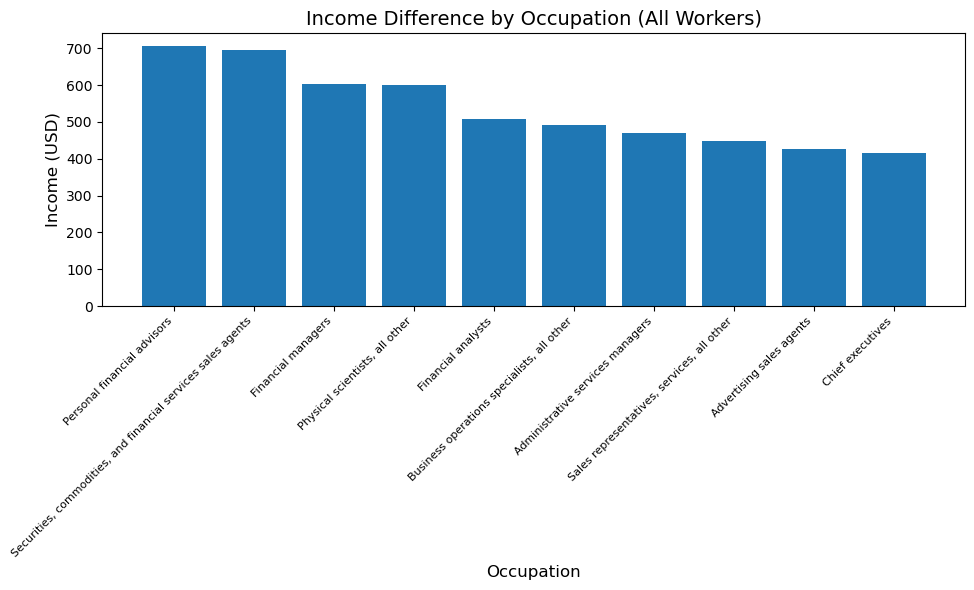

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(df_all_sub['Occupation'], df_all_sub['diff'])
plt.title('Income Difference by Occupation (All Workers)', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

plt.show()